# codigo de tratamento dos graficos funcionando.

tempoSensor1     0.03
tempoSensor2    44.17
tempoSensor3     72.1
tempoSensor4    85.41
Name: 8, dtype: object

velocidadeSensor1       0
velocidadeSensor2    0.05
velocidadeSensor3    0.09
velocidadeSensor4    0.23
Name: 8, dtype: object

aceleracaoSensor1       0
aceleracaoSensor2     0.0
aceleracaoSensor3     0.0
aceleracaoSensor4    0.01
Name: 8, dtype: object

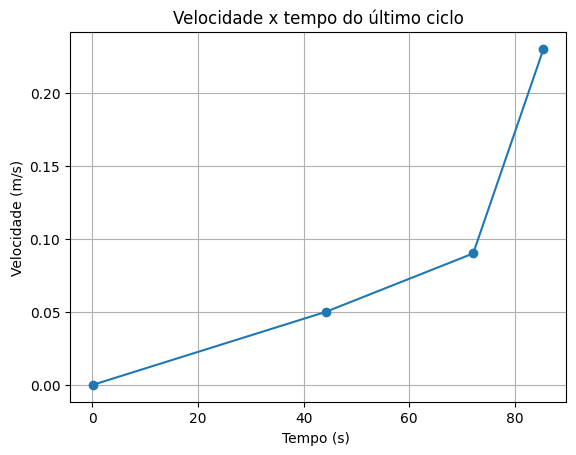

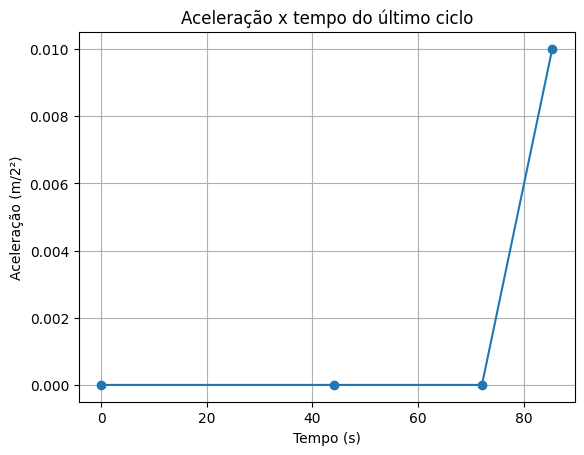

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados do arquivo CSV
tabela = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6kSZFFAFOmYCWc4oo2MgRmykG67g9W39rGsDJHnPdUCjXrVXRtN9Opt1JiViyXbBpmGqn3ACT3Noj/pub?gid=0&single=true&output=csv", sep=",")

# Obtendo o último ciclo de tempo, velocidade e aceleração
linhasTabela = len(tabela) - 1
ultimoCicloTempo = tabela.loc[linhasTabela, ["tempoSensor1", "tempoSensor2", "tempoSensor3", "tempoSensor4"]]
ultimoCicloVelocidade = tabela.loc[linhasTabela, ["velocidadeSensor1", "velocidadeSensor2", "velocidadeSensor3", "velocidadeSensor4"]]
ultimoCicloAceleração = tabela.loc[linhasTabela, ["aceleracaoSensor1", "aceleracaoSensor2", "aceleracaoSensor3", "aceleracaoSensor4"]]

display(ultimoCicloTempo)
display(ultimoCicloVelocidade)
display(ultimoCicloAceleração)

# Criando um gráfico de linha para Velocidade x Tempo do último ciclo
plt.plot(ultimoCicloTempo, ultimoCicloVelocidade, marker='o', linestyle='-')
plt.title("Velocidade x tempo do último ciclo")
plt.xlabel("Tempo (s) ")
plt.ylabel("Velocidade (m/s)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()

# Criando um gráfico de linha para Aceleração x Tempo do último ciclo
plt.plot(ultimoCicloTempo, ultimoCicloAceleração, marker='o', linestyle='-')
plt.title("Aceleração x tempo do último ciclo")
plt.xlabel("Tempo (s)")
plt.ylabel("Aceleração (m/2²)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()


# codigo com curva suavizadas

tempoSensor1     0.03
tempoSensor2    44.17
tempoSensor3     72.1
tempoSensor4    85.41
Name: 8, dtype: object

array([0.        , 0.00076739, 0.00153056, 0.0022895 , 0.00304424,
       0.00379477, 0.00454112, 0.00528328, 0.00602128, 0.00675511,
       0.00748479, 0.00821032, 0.00893173, 0.00964901, 0.01036217,
       0.01107123, 0.0117762 , 0.01247708, 0.01317388, 0.01386662,
       0.0145553 , 0.01523993, 0.01592052, 0.01659708, 0.01726962,
       0.01793816, 0.01860269, 0.01926323, 0.01991979, 0.02057238,
       0.02122101, 0.02186568, 0.02250641, 0.0231432 , 0.02377607,
       0.02440503, 0.02503008, 0.02565123, 0.0262685 , 0.02688189,
       0.02749141, 0.02809707, 0.02869888, 0.02929686, 0.029891  ,
       0.03048133, 0.03106784, 0.03165055, 0.03222948, 0.03280461,
       0.03337598, 0.03394358, 0.03450743, 0.03506753, 0.0356239 ,
       0.03617654, 0.03672547, 0.03727069, 0.03781221, 0.03835005,
       0.0388842 , 0.03941469, 0.03994152, 0.0404647 , 0.04098424,
       0.04150015, 0.04201244, 0.04252111, 0.04302619, 0.04352767,
       0.04402557, 0.04451989, 0.04501065, 0.04549786, 0.04598

array([ 0.00000000e+00,  5.78319209e-05,  1.15302396e-04,  1.72412226e-04,
        2.29162208e-04,  2.85553143e-04,  3.41585829e-04,  3.97261065e-04,
        4.52579652e-04,  5.07542388e-04,  5.62150073e-04,  6.16403505e-04,
        6.70303484e-04,  7.23850809e-04,  7.77046279e-04,  8.29890694e-04,
        8.82384853e-04,  9.34529554e-04,  9.86325598e-04,  1.03777378e-03,
        1.08887491e-03,  1.13962978e-03,  1.19003918e-03,  1.24010392e-03,
        1.28982481e-03,  1.33920262e-03,  1.38823818e-03,  1.43693227e-03,
        1.48528569e-03,  1.53329925e-03,  1.58097374e-03,  1.62830996e-03,
        1.67530871e-03,  1.72197080e-03,  1.76829701e-03,  1.81428816e-03,
        1.85994503e-03,  1.90526843e-03,  1.95025916e-03,  1.99491801e-03,
        2.03924579e-03,  2.08324329e-03,  2.12691131e-03,  2.17025066e-03,
        2.21326213e-03,  2.25594653e-03,  2.29830464e-03,  2.34033727e-03,
        2.38204522e-03,  2.42342929e-03,  2.46449028e-03,  2.50522898e-03,
        2.54564620e-03,  

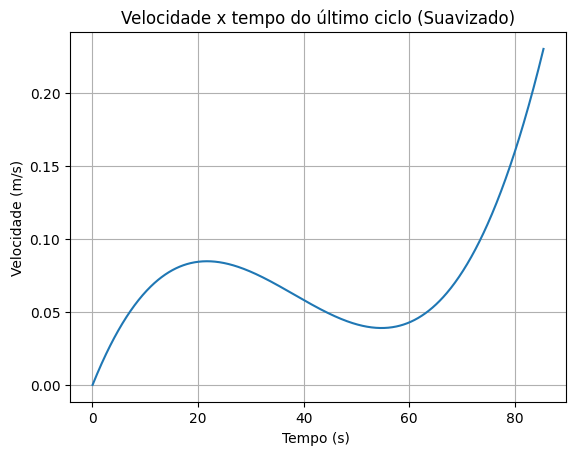

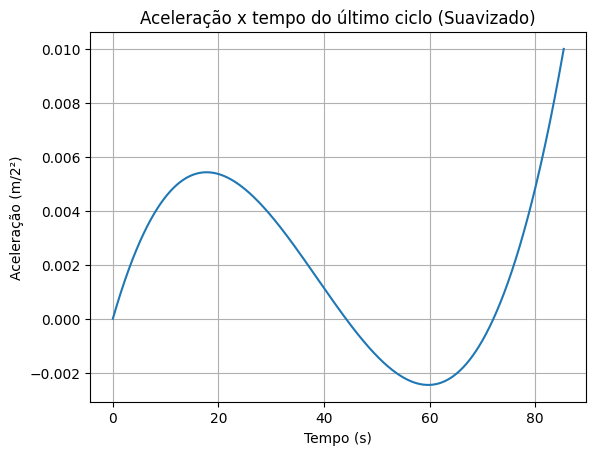

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando os dados do arquivo CSV
tabela = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6kSZFFAFOmYCWc4oo2MgRmykG67g9W39rGsDJHnPdUCjXrVXRtN9Opt1JiViyXbBpmGqn3ACT3Noj/pub?gid=0&single=true&output=csv", sep=",")

# Obtendo o último ciclo de tempo, velocidade e aceleração
linhasTabela = len(tabela) - 1
ultimoCicloTempo = tabela.loc[linhasTabela, ["tempoSensor1", "tempoSensor2", "tempoSensor3", "tempoSensor4"]]
ultimoCicloVelocidade = tabela.loc[linhasTabela, ["velocidadeSensor1", "velocidadeSensor2", "velocidadeSensor3", "velocidadeSensor4"]]
ultimoCicloAceleração = tabela.loc[linhasTabela, ["aceleracaoSensor1", "aceleracaoSensor2", "aceleracaoSensor3", "aceleracaoSensor4"]]

# Criando uma função de interpolação cúbica
def cubic_interpolation(x, y, new_x):
    from scipy.interpolate import CubicSpline
    spline = CubicSpline(x, y)
    interpolated_values = spline(new_x)
    return interpolated_values

# Aumentando a densidade de pontos de interpolação
new_x = np.linspace(min(ultimoCicloTempo), max(ultimoCicloTempo), 1000)

# Interpolando os dados de velocidade e aceleração nos pontos do arquivo CSV
smoothed_velocidade = cubic_interpolation(np.array(ultimoCicloTempo), np.array(ultimoCicloVelocidade), new_x)
smoothed_aceleracao = cubic_interpolation(np.array(ultimoCicloTempo), np.array(ultimoCicloAceleração), new_x)

# Exibindo os últimos valores suavizados de tempo, velocidade e aceleração
display(ultimoCicloTempo)
display(smoothed_velocidade)
display(smoothed_aceleracao)

# Criando um gráfico de linha suavizado para Velocidade x Tempo do último ciclo
plt.plot(new_x, smoothed_velocidade, marker='', linestyle='-')
plt.title("Velocidade x tempo do último ciclo (Suavizado)")
plt.xlabel("Tempo (s) ")
plt.ylabel("Velocidade (m/s)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()

# Criando um gráfico de linha suavizado para Aceleração x Tempo do último ciclo
plt.plot(new_x, smoothed_aceleracao, marker='', linestyle='-')
plt.title("Aceleração x tempo do último ciclo (Suavizado)")
plt.xlabel("Tempo (s)")
plt.ylabel("Aceleração (m/2²)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()



In [12]:
import pandas as pd

# URL do arquivo CSV
url_csv = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6kSZFFAFOmYCWc4oo2MgRmykG67g9W39rGsDJHnPdUCjXrVXRtN9Opt1JiViyXbBpmGqn3ACT3Noj/pub?gid=0&single=true&output=csv"

# Carregando os dados do arquivo CSV a partir da URL
tabela = pd.read_csv(url_csv, sep=",")

display(tabela.loc[0, ["tempoSensor1", "tempoSensor2", "tempoSensor3", "tempoSensor4"]])
# Visualizando as primeiras linhas do DataFrame
# display(tabela.head())

# Certifique-se de que os nomes das colunas estejam corretos


tempoSensor1    0.03
tempoSensor2    1.66
tempoSensor3     3.7
tempoSensor4    5.27
Name: 0, dtype: object